In [32]:
# imports

import pysiaf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from matplotlib.collections import PatchCollection


In [33]:
# Load NIRCam SIAF

nrc_siaf = pysiaf.Siaf('NIRCam')

# To see the aperture names, uncomment this line:
#nrc_siaf.apernames


/Users/mboyer/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


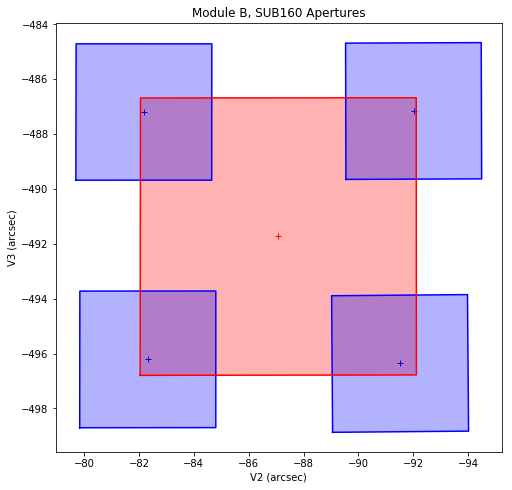

In [34]:
# Create a plot that shows the SUB160 apertures on Module B. 

# Figure setup
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

# Plot the outline of each aperture, with reference points marked (plus symbol is default). 
# Plotting blue and red lines separately, blue for short wavelength and red for long wavelength.

nrc_siaf.plot('tel', ['NRCB1_SUB160','NRCB2_SUB160','NRCB3_SUB160','NRCB4_SUB160'],
              mark_ref=True, fill_color='None', color='Blue', label=False)
nrc_siaf.plot('tel', ['NRCB5_SUB160'],
              mark_ref=True, fill_color='None', color='Red', label=False, clear=False)

plt.title('Module B, SUB160 Apertures')

# Fill in the apertures with transparent colors (there's probably a better way to do this...)

lw = nrc_siaf['NRCB5_SUB160']  #grab the aperture of interest
c = lw.corners('tel')  # grab the corners of that aperture
clist = np.array([[c[0][i], c[1][i]] for i in [0, 1, 2, 3]])  # reformat the corners array
# plot the aperture:
line = plt.Polygon(clist, facecolor='r', closed=True, alpha=0.3)  
plt.gca().add_line(line)

# Repeat for other apertures, selecting colors as appropriate
aperfill = ['NRCB1_SUB160', 'NRCB2_SUB160', 'NRCB3_SUB160', 'NRCB4_SUB160']
for i in aperfill:
    sw = nrc_siaf[i]
    c = sw.corners('tel')
    clist = np.array([[c[0][i], c[1][i]] for i in [0, 1, 2, 3]])
    line = plt.Polygon(clist, facecolor='b', closed=True, alpha=0.3)
    plt.gca().add_line(line)




/Users/mboyer/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(145,-510,'A1')

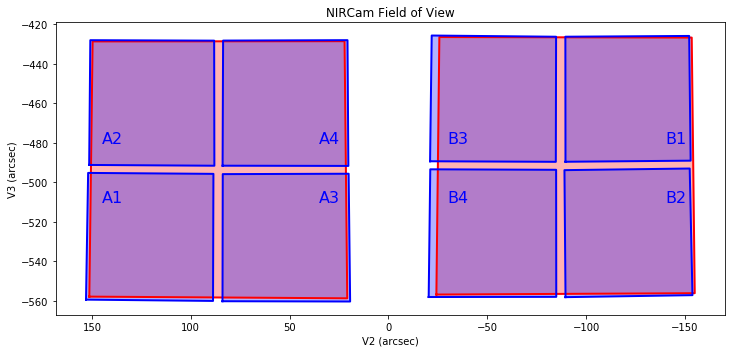

In [35]:
# Make a plot of the full NIRCam FOV with SCA labels

fig = plt.figure(figsize=(12, 6))

# LW full arrays
nrc_siaf.plot('tel', ['NRCB5_FULL','NRCA5_FULL'], fill_color='None', color='Red', label=False, lw=2)

# SW full arrays
nrc_siaf.plot('tel', ['NRCB1_FULL','NRCB2_FULL','NRCB3_FULL','NRCB4_FULL',
                      'NRCA1_FULL','NRCA2_FULL','NRCA3_FULL','NRCA4_FULL'],
              fill_color='None', color='Blue', label=False, clear=False, lw=2)


plt.title('NIRCam Field of View')

aperfill = ['NRCB5_FULL', 'NRCA5_FULL']

for i in aperfill:
    lw = nrc_siaf[i]
    c = lw.corners('tel')
    clist = np.array([[c[0][i], c[1][i]] for i in [0, 1, 2, 3]])
    line = plt.Polygon(clist, facecolor='r', closed=True, alpha=0.3)
    plt.gca().add_line(line)

aperfill = ['NRCA1_FULL', 'NRCA2_FULL', 'NRCA3_FULL', 'NRCA4_FULL',
            'NRCB1_FULL', 'NRCB2_FULL', 'NRCB3_FULL', 'NRCB4_FULL']

for i in aperfill:
    lw = nrc_siaf[i]
    c = lw.corners('tel')
    clist = np.array([[c[0][i], c[1][i]] for i in [0, 1, 2, 3]])
    line = plt.Polygon(clist, facecolor='b', closed=True, alpha=0.3)
    plt.gca().add_line(line)



# Annotate the SCA names
ax = plt.gca()
ax.text(-140, -480, 'B1', color='Blue', fontsize=16)
ax.text(-140, -510, 'B2', color='Blue', fontsize=16)
ax.text( -30, -480, 'B3', color='Blue', fontsize=16)
ax.text( -30, -510, 'B4', color='Blue', fontsize=16)

ax = plt.gca()
ax.text( 35, -480, 'A4', color='Blue', fontsize=16)
ax.text( 35, -510, 'A3', color='Blue', fontsize=16)
ax.text(145, -480, 'A2', color='Blue', fontsize=16)
ax.text(145, -510, 'A1', color='Blue', fontsize=16)




/Users/mboyer/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(48,-419,'A5_MASKLWB')

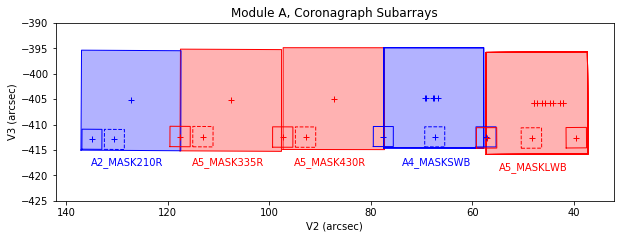

In [36]:
# Plot the coronagraph subarrays

fig = plt.figure(figsize=(10, 6))

# Start with the LW subarrays (in red)
nrc_siaf.plot('tel', ['NRCA5_MASK335R', 'NRCA5_MASK430R', 'NRCA5_MASKLWB_F250W',
                      'NRCA5_MASKLWB_F300M', 'NRCA5_MASKLWB_F277W', 'NRCA5_MASKLWB_F335M',
                      'NRCA5_MASKLWB_F360M', 'NRCA5_MASKLWB_F356W', 'NRCA5_MASKLWB_F410M',
                      'NRCA5_MASKLWB_F430M', 'NRCA5_MASKLWB_F460M', 'NRCA5_MASKLWB_F480M',
                      'NRCA5_MASKLWB_F444W'],
              mark_ref=True, fill_color='None', color='Red', label=False, clear=False, lw=1)

# These are teh SW subarrays
nrc_siaf.plot('tel', ['NRCA2_MASK210R', 'NRCA4_MASKSWB_F182M', 'NRCA4_MASKSWB_F187N',
                      'NRCA4_MASKSWB_F210M', 'NRCA4_MASKSWB_F212N', 'NRCA4_MASKSWB_F200W'],
              mark_ref=True, fill_color='None', color='Blue', label=False, clear=False, lw=1)

# These are the TA apertures for SW (bright sources)
nrc_siaf.plot('tel', ['NRCA2_TAMASK210R', 'NRCA4_TAMASKSWB', 'NRCA4_TAMASKSWBS'],
              mark_ref=True, fill_color='None', color='Blue', label=False, clear=False, lw=1)

# These are the faint source TA apertures for SW
nrc_siaf.plot('tel', ['NRCA2_FSTAMASK210R', 'NRCA4_FSTAMASKSWB'],
              mark_ref=True, fill_color='None', color='Blue', label=False, clear=False, lw=1, ls='--')

# These are the bright source TA apertures for LW
nrc_siaf.plot('tel', ['NRCA5_TAMASK335R', 'NRCA5_TAMASK430R', 'NRCA5_TAMASKLWB', 'NRCA5_TAMASKLWBL'],
              mark_ref=True, fill_color='None', color='Red', label=False, clear=False, lw=1)

# These are the faint source TA apertures for SW
nrc_siaf.plot('tel', ['NRCA5_FSTAMASKLWB', 'NRCA5_FSTAMASK335R', 'NRCA5_FSTAMASK430R'],
              mark_ref=True, fill_color='None', color='Red', label=False, clear=False, lw=1, ls='--')


plt.title('Module A, Coronagraph Subarrays')

plt.ylim(-425, -390) #restrict axes

# Fill in the main subarrays

aperfill = ['NRCA5_MASKLWB', 'NRCA5_MASK335R', 'NRCA5_MASK430R']

for i in aperfill:
    lw = nrc_siaf[i]
    c = lw.corners('tel')
    clist = np.array([[c[0][i], c[1][i]] for i in [0, 1, 2, 3]])
    line = plt.Polygon(clist, facecolor='r', closed=True, alpha=0.3)
    plt.gca().add_line(line)

aperfill = ['NRCA4_MASKSWB', 'NRCA2_MASK210R']

for i in aperfill:
    lw = nrc_siaf[i]
    c = lw.corners('tel')
    clist = np.array([[c[0][i], c[1][i]] for i in [0, 1, 2, 3]])
    line = plt.Polygon(clist, facecolor='b', closed=True, alpha=0.3)
    plt.gca().add_line(line)

    
# Annotations
ax = plt.gca()
ax.text(108, -418, 'A5_MASK335R', color='Red', ha='center')
ax.text(128, -418, 'A2_MASK210R', color='Blue', ha='center')
ax.text(88, -418, 'A5_MASK430R', color='Red', ha='center')
ax.text(67, -418, 'A4_MASKSWB', color='Blue', ha='center')
ax.text(48, -419, 'A5_MASKLWB', color='Red', ha='center')




/Users/mboyer/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(99.5,-558,'SUBGRISM64')

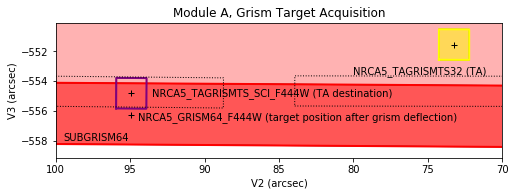

In [37]:
# Plot some Grism subarrays to demonstrate the TA process

fig = plt.figure(figsize=(8, 6))

# Start with LW grism subarray. First line marks the reference point in black, second line outlines the aperture
nrc_siaf.plot('tel', ['NRCA5_GRISM64_F444W'],
             mark_ref=True, label=False, color='k', fill_color='None', lw=1)
nrc_siaf.plot('tel', ['NRCA5_GRISM64_F444W'],
             mark_ref=False, label=False, color='r', fill_color='None', lw=2, clear=False)



# Add the TA boxes. Mark reference points in black, and outline in color
nrc_siaf.plot('tel', ['NRCA5_TAGRISMTS_SCI_F444W'],
              mark_ref=True, label=False, color='k', fill_color='None', lw=1, clear=False)
nrc_siaf.plot('tel', ['NRCA5_TAGRISMTS32'],
              mark_ref=True, label=False, color='k', fill_color='None', lw=1, clear=False)


nrc_siaf.plot('tel', ['NRCA5_TAGRISMTS_SCI_F444W'],
              mark_ref=False, label=False, color='Purple', fill_color='None', lw=2, clear=False)
nrc_siaf.plot('tel', ['NRCA5_TAGRISMTS32'],
              mark_ref=False, label=False, color='Yellow', fill_color='None', lw=2, clear=False)

# Add the associated SW subarrays in dotted lines
nrc_siaf.plot('tel', ['NRCA1_GRISMTS64','NRCA3_GRISMTS64'],
              mark_ref=False, label=False, color='k', ls=':', fill_color='None', lw=1, clear=False)

# restrict axes range
plt.xlim(100, 70)


plt.title('Module A, Grism Target Acquisition')


# Fill in apertures
aperfill = ['NRCA5_FULL', 'NRCA5_GRISM64_F444W', 'NRCA5_GRISM64_F444W']

for i in aperfill:
    lw = nrc_siaf[i]
    c = lw.corners('tel')
    clist = np.array([[c[0][i], c[1][i]] for i in [0, 1, 2, 3]])
    line = plt.Polygon(clist, facecolor='r', closed=True, alpha=0.3)
    plt.gca().add_line(line)



lw = nrc_siaf['NRCA5_TAGRISMTS32']
c = lw.corners('tel')
clist = np.array([[c[0][i], c[1][i]] for i in [0, 1, 2, 3]])
line = plt.Polygon(clist, facecolor='Yellow', closed=True, alpha=0.5)
plt.gca().add_line(line)


ax = plt.gca()

# Annotate

ax.text(94.5, -556.6, 'NRCA5_GRISM64_F444W (target position after grism deflection)', color='k')
ax.text(93.5, -555.0, 'NRCA5_TAGRISMTS_SCI_F444W (TA destination)', color='k')
ax.text(80.0, -553.5, 'NRCA5_TAGRISMTS32 (TA)', color='k')
ax.text(99.5, -558.0, 'SUBGRISM64', color='k')

